Importing  necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning and Pre-processing

In [3]:
df=pd.read_csv('IMDb Movies India.csv',encoding='latin-1')

In [4]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.shape

(15509, 10)

In [6]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [7]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid


### Year Column

#### Convert `Year` to datetime from object

we drop 1st row, as it has more NaN values

In [11]:
df=df.iloc[1:,:]

In [12]:
df.Year.unique()

array(['(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', nan, '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

As `Year` has parentheses we have to remove it

In [13]:
df.Year=df.Year.map(lambda x: x[1:-1],na_action='ignore')

In [14]:
df.Year.dtypes

dtype('O')

In [15]:
df.Year=pd.to_datetime(df.Year)

In [16]:
df.Year=df.Year.dt.year

### Vote Column

#### Conver Vote to numeric

In [17]:
df.Votes.unique()

array(['8', nan, '35', ..., '70,344', '408', '1,496'], dtype=object)

In [18]:
def change_dtypes_votes(x):
    if x:
        x=str(x)
        l=x.split(',')
        r=''.join(l)
        r=[i for i in r if i.isdigit()]
        r=''.join(r)
        
  
    return int(r)
    

In [19]:
change_dtypes_votes('2,44')

244

In [20]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [21]:
df.Votes=df.Votes.map(change_dtypes_votes,na_action='ignore')

In [22]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


### Duration

#### Convert Duration into numeric

 Verify, all values are in min or not

In [23]:
df.shape

(15508, 10)

In [24]:
df.Duration.str.contains('min').value_counts(dropna=False)

Duration
NaN     8268
True    7240
Name: count, dtype: int64

In [25]:
8268+7240

15508

Yes all values are in `min`

In [26]:
def duration_remove_min(x):
    if x:
        x=x.split()[0]
    return int(x)
    

In [27]:
duration_remove_min('180 min')

180

In [28]:
df.Duration=df.Duration.map(duration_remove_min,na_action='ignore')
df.rename(columns={'Duration':'Duration_in_min'},inplace=True)

In [29]:
df.head(2)

,Name,Year,Duration_in_min,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [30]:
df.dtypes

Name                object
Year               float64
Duration_in_min    float64
Genre               object
Rating             float64
Votes              float64
Director            object
Actor 1             object
Actor 2             object
Actor 3             object
dtype: object

#### Conclusion: Now we have done we data pre-processing

# EDA

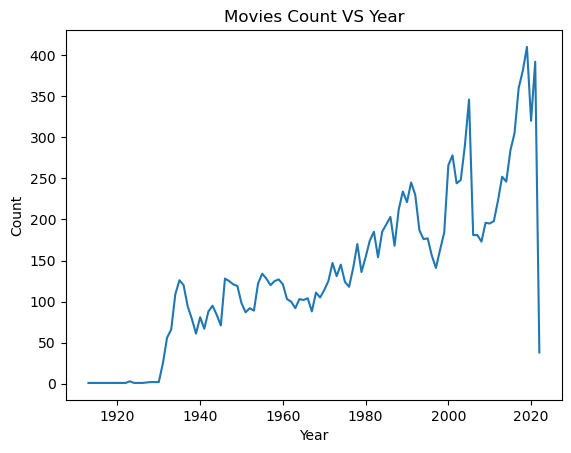

In [31]:
df.Year.value_counts().sort_index().plot()
plt.title('Movies Count VS Year')
plt.ylabel('Count')
plt.show()

From above fig
- As time goes, movies creation has increases.
- After 2000, growth has take place in Film industries 
- There is linear realtion in time and movie count.

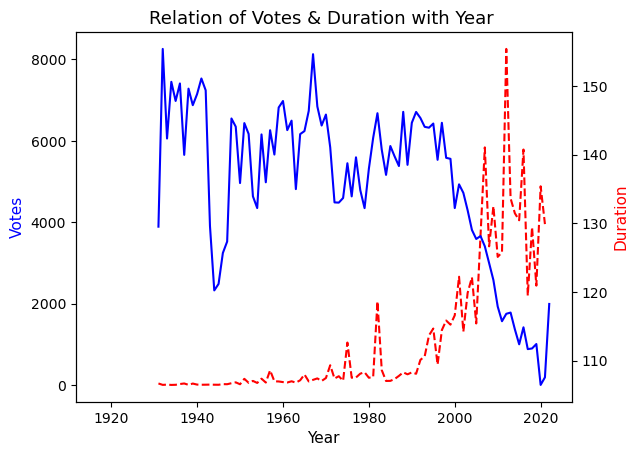

In [32]:
# Data collection
year_group=df.groupby('Year')
votes=year_group.Votes.mean()
durations=year_group.Duration_in_min.mean()

x=votes.index
votes_y=votes.values
durations_y=durations.values

# Plot

fig,ax1=plt.subplots()
ax2=ax1.twinx()

ax1.plot(x,votes_y,'r--')
ax2.plot(x,durations_y,'b-')

ax1.set_ylabel('Votes',color='blue',size=11)
ax2.set_ylabel('Duration',color='red',size=11)
ax1.set_xlabel('Year',size=11)
plt.title("Relation of Votes & Duration with Year ",size=13)

plt.show()

From above Fig
- More people are like to watch small movies
- As the movies duration increases, people are get bored
- We should make movies of max duration upto **130 min**

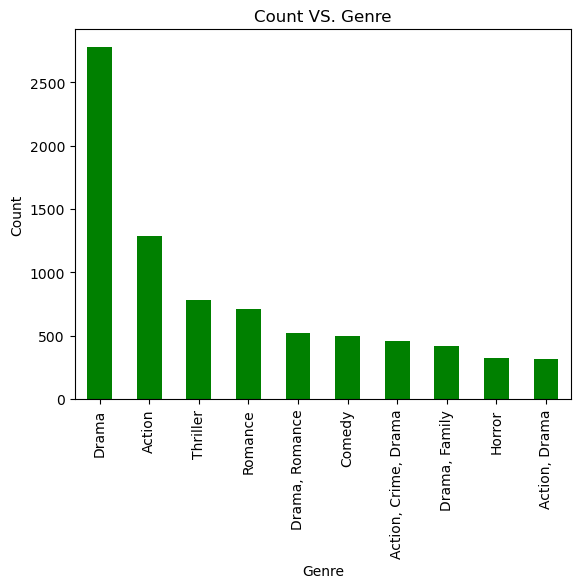

In [33]:
df.Genre.value_counts().head(10).plot(kind='bar',color='green')
plt.title('Count VS. Genre')
plt.ylabel('Count')
plt.show()


From above Fig
- Most of movies are of Drama
- For horror movies there is less competition


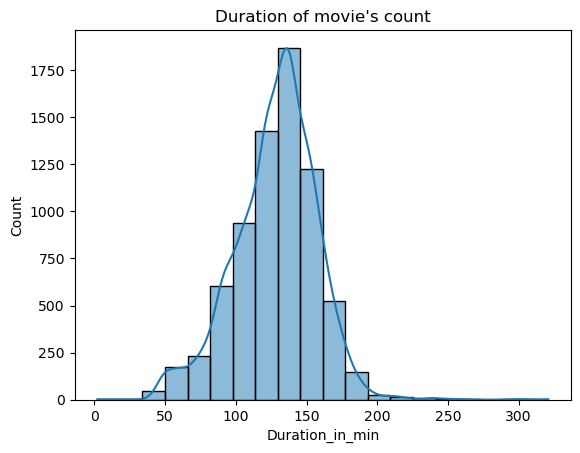

In [34]:
sns.histplot(data=df,x='Duration_in_min',bins=20,kde=True)
plt.title("Duration of movie's count")
plt.show()

From above fig
- Most of movies are of 120-150 min duration.
- As we saw above, it good so people will not get bored for long movies
- This duration ratio will help in growth of Film industires

# Feature Engineering

In [35]:
inputs=df.copy()

Let select the Numeric and categorical columns

In [36]:
numeric_cols=inputs.select_dtypes(np.number).columns.tolist()
categorical_cols=inputs.select_dtypes('O').columns.tolist()

In [37]:
numeric_cols

['Year', 'Duration_in_min', 'Rating', 'Votes']

In [38]:
categorical_cols

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

## Imputing Missing values

###  # Numeric Columns

In [39]:
inputs[numeric_cols].isna().sum()

Year                527
Duration_in_min    8268
Rating             7589
Votes              7588
dtype: int64

In [40]:
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(strategy='mean')
imp1.fit(inputs[numeric_cols])

SimpleImputer()

In [41]:
inputs[numeric_cols]=imp1.transform(inputs[numeric_cols])

In [42]:
inputs[numeric_cols].isna().sum()

Year               0
Duration_in_min    0
Rating             0
Votes              0
dtype: int64

### # Categorical Columns

In [43]:
inputs[categorical_cols].isna().sum()

Name           0
Genre       1877
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [44]:
imp2=SimpleImputer(strategy='most_frequent')
imp2.fit(inputs[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [45]:
inputs[categorical_cols]=imp2.transform(inputs[categorical_cols])

In [46]:
inputs[categorical_cols].isna().sum()

Name        0
Genre       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### Separate input and Targer

In [47]:
target=inputs.Rating
inputs=inputs.drop('Rating',axis=1)


numeric_cols=inputs.select_dtypes(include='number').columns.tolist()
categorical_cols=inputs.select_dtypes(include='O').columns.tolist()

In [48]:
numeric_cols

['Year', 'Duration_in_min', 'Votes']

In [49]:
categorical_cols

['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

## Scaling

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler=StandardScaler()
scaler.fit(inputs[numeric_cols])

StandardScaler()

In [52]:
inputs[numeric_cols]=scaler.transform(inputs[numeric_cols])

In [53]:
inputs[numeric_cols].head(2)

,Year,Duration_in_min,Votes
1,1.280522,-0.968246,-0.232839
2,1.360586,-1.930086,0.000000


## Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
for col in categorical_cols:
    encoder=LabelEncoder()
    inputs[col]=encoder.fit_transform(inputs[col])
    print(col,'is done')

Name is done
Genre is done
Director is done
Actor 1 is done
Actor 2 is done
Actor 3 is done


In [56]:
inputs[categorical_cols].head()

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
1,0,299,1548,3280,4790,527
2,1,351,5123,3713,2866,3450
3,2,228,3319,2917,1504,4020
4,6,299,385,3112,3462,405
5,7,197,3800,895,123,3829


####  Conclusion : Feature Engineering is done
Now we form train & target data i.e X,y

In [57]:
X=inputs[numeric_cols+categorical_cols]
y=target

# Model Building

### Split data

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,target,random_state=42)

In [59]:
X_train.shape,y_train.shape

((11631, 9), (11631,))

In [60]:
X_test.shape,y_test.shape

((3877, 9), (3877,))

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
xgb=GradientBoostingRegressor()
xgb.fit(X_train,y_train)

GradientBoostingRegressor()

I have tired with other models, but XGB has given good accuracy as compare to others

# Model Evaluation

In [77]:

def evaluation(**par):
    xgb=GradientBoostingRegressor(**par)
    xgb.fit(X_train,y_train)
    seen_d=xgb.score(X_train,y_train)
    unseen_d=xgb.score(X_test,y_test)
    return seen_d,unseen_d
    

In [99]:
def plot_eval(x,seen,unseen,name):
    
    plt.plot(x,seen,label='train')
    plt.plot(x,unseen,label='Val')
    plt.title(f"Evalution of {name}")
    plt.ylabel('Accuracy')
    plt.xlabel(name)
    plt.legend()
    plt.show()

## Loss

### loss=  {'squared_error', 'absolute_error', 'huber', 'quantile'}

In [101]:
seen_data=[]
unseen_data=[]
for i in ['squared_error', 'absolute_error', 'huber', 'quantile']: 
    s,u=(evaluation(loss=i))
    seen_data.append(s)
    unseen_data.append(u)
    

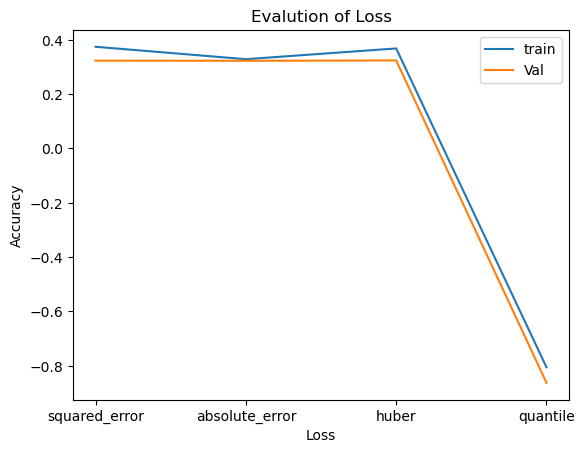

In [102]:
plot_eval(['squared_error', 'absolute_error', 'huber', 'quantile'],seen_data,unseen_data,'Loss')

#### loss=absolute_error

## n_estimators

In [97]:
seen_data=[]
unseen_data=[]
n_estimators_list=[100,300,500,700,900]
for i in n_estimators_list: 
    s,u=(evaluation(n_estimators=i))
    seen_data.append(s)
    unseen_data.append(u)

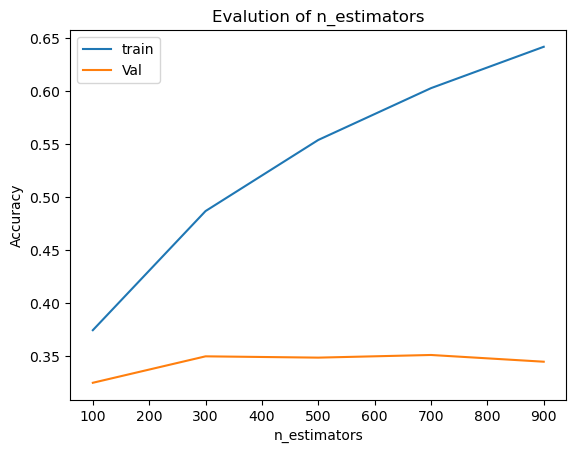

In [100]:
plot_eval(n_estimators_list,seen_data,unseen_data,'n_estimators')

#### n_estimators=300

## min_samples_split

In [105]:
seen_data=[]
unseen_data=[]
min_samples_split_list=[2,4,5,6,8,9,12,14]
for i in min_samples_split_list: 
    s,u=(evaluation(min_samples_split=i))
    seen_data.append(s)
    unseen_data.append(u)

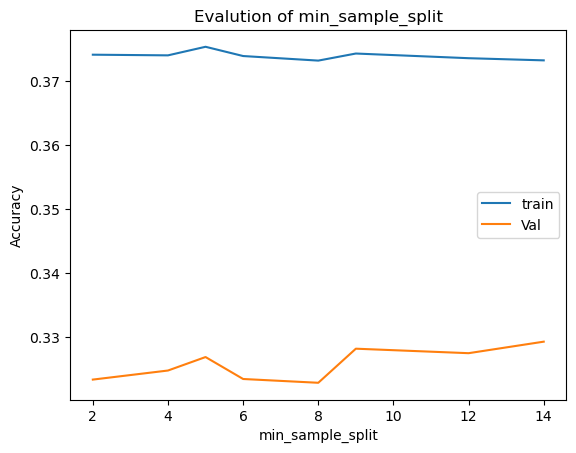

In [106]:
plot_eval(min_samples_split_list,seen_data,unseen_data,'min_sample_split')

#### min_sample_split=7

## max_depth

In [107]:
seen_data=[]
unseen_data=[]
max_depth_list=[2,4,5,6,8,9,12,14]
for i in max_depth_list: 
    s,u=(evaluation(max_depth=i))
    seen_data.append(s)
    unseen_data.append(u)

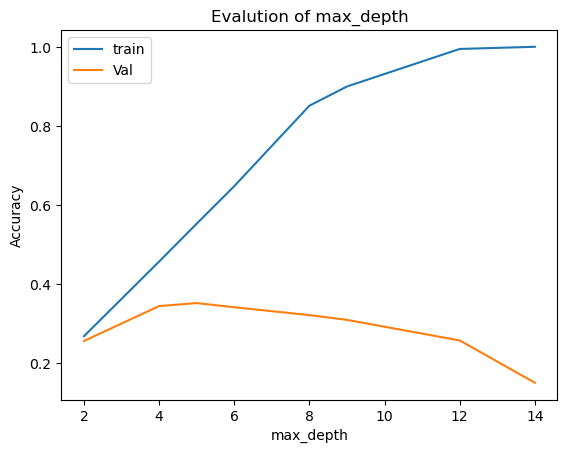

In [109]:
plot_eval(max_depth_list,seen_data,unseen_data,'max_depth')

#### max_depth=5

# Final Model

In [112]:
xgb=GradientBoostingRegressor(loss='absolute_error',n_estimators=300,min_samples_split=7,max_depth=5)
xgb.fit(X,y)

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_split=7, n_estimators=300)

In [113]:
xgb.score(X_test,y_test)

0.48927821428566776

In the begin,it was 25-28% accuracy, after hypertuning and evalution we are able to increase upto 50%

# Model Save

In [114]:
import joblib

In [115]:
joblib.dump(xgb,'model')

['model']

#### Data Science work is Done.